# Laboratório 6: Teste de hipóteses


Bem-vindo ao Laboratório 6! Nesta tarefa, desenvolveremos uma compreensão mais aprofundada dos testes de hipóteses, sobre os quais você pode aprender mais em [CIT 11](https://inferentialthinking.com/chapters/11/Testing_Hypotheses.html). As palestras relevantes são as Aulas 19, 20 e 21.

Você deve concluir todo este laboratório e enviá-lo ao Moodle até às 23h59 da data de vencimento.

In [40]:
# Descomente para executar no Colab
! pip install babypandas --quiet


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
import numpy as np
import babypandas as bpd
import math

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)

## 1. Toque Terapêutico 👆

O Toque Terapêutico (TT) é uma terapia energética que os profissionais afirmam poder promover saúde e relaxamento. Os profissionais colocam as mãos perto do paciente e dizem que são capazes de detectar e manipular o chamado Campo de Energia Humana (HEF) do paciente.
O TT foi popular ao longo do século 20 e foi apontado como uma ótima maneira de trazer equilíbrio à saúde de uma pessoa. Você pode [ler mais sobre o TT aqui.](https://www.mountsinai.org/health-library/treatment/therapeutic-touch).

### Experiência de Emily Rosa

Em 1996, Emily Rosa tinha 9 anos e teve ampla exposição ao mundo do TT devido aos seus pais, que eram médicos e céticos em relação à ideia do TT. Para seu projeto de feira de ciências da 4ª série, Emily decidiu testar se os profissionais de TT poderiam realmente interagir com o HEF de uma pessoa.

A experiência de Emily foi limpa, simples e eficaz. Devido às ocupações de seus pais na área médica, ela teve fácil acesso aos praticantes de TT. Com cada praticante, ela realizou o seguinte experimento várias vezes durante vários dias.

1. Primeiro, ela se separava do praticante com uma espécie de tábua, para que eles não pudessem se ver.
2. Em seguida, ela pedia que colocassem ambas as mãos em uma abertura no tabuleiro.
3. Emily jogaria uma moeda honesta para determinar aleatoriamente se deveria colocar as mãos perto da mão esquerda ou direita do praticante.
4. Finalmente, Emily pediria ao praticante de TT que especificasse se conseguiria detectar o Campo de Energia Humana (HEF) de Emily perto da mão esquerda ou da mão direita.

No geral, Emily realizou 280 experimentos e o praticante escolheu a mão correta 123 vezes.

O principal objetivo de Emily aqui era testar se as suposições dos praticantes de TT eram ou não aleatórias, como o lançamento de uma moeda. Na maioria dos experimentos médicos, esta é a norma. Queremos testar se algum tratamento tem ou não efeito. Isto *não* é o mesmo que testar se o tratamento realmente funciona como pretendido.

Começaremos agora a formular o experimento de Emily em termos da terminologia de hipóteses que aprendemos recentemente.

<!-- COMEÇAR PERGUNTA -->

**Pergunta 1.1.** Quais são as hipóteses nula e alternativa para o experimento de Emily? Escreva ambas as suas respostas na célula abaixo.

<!--
COMEÇAR PERGUNTA
nome: q1_1
manual: verdadeiro
-->

_Digite sua resposta aqui, substituindo este texto._

<!-- FIM DA PERGUNTA -->



**Pergunta 1.2.** Lembre-se de que em 280 experimentos, o praticante adivinhou a mão correta 123 vezes. De acordo com a hipótese nula, em média, que proporção de vezes esperamos que o praticante adivinhe a mão correta? Certifique-se de que sua resposta esteja entre 0 e 1.

In [42]:
expected_correct = 0.5
expected_correct

0.5

In [43]:
grader.check("q1_2")

NameError: name 'grader' is not defined

O objetivo agora é ver se o nosso desvio em relação a esta proporção esperada de respostas corretas se deve a algo diferente do acaso.

**Pergunta 1.3.** Qual das alternativas a seguir é a melhor estatística para testar este modelo? Atribua `best_stat` a 1, 2 ou 3.

1. A diferença entre a proporção esperada de respostas corretas e a proporção real de respostas corretas.
2. A diferença absoluta entre a proporção esperada de respostas corretas e a proporção real de respostas corretas.
3. A soma da proporção esperada de respostas corretas e a proporção real de respostas corretas.

In [ ]:
best_stat = 1

***Observação:*** Se você inicialmente respondeu 1.3 incorretamente, reserve um tempo para revisar o [lançamento de moedas, abordado na Aula 20](https://dsc10.com/resources/lectures/lec20/lec20.html#Example:-Is-our-coin-fair?) antes de continuar.

**Questão 1.4.** Conclua a implementação da função `calculate_test_stat`, que recebe uma proporção esperada e uma proporção real e retorna o valor da estatística de teste que você escolheu (como uma proporção entre 0 e 1). Suponha que ambas as entradas sejam proporções entre 0 e 1.

In [ ]:
def test_statistic(expected_prop, actual_prop):
    return actual_prop - expected_prop

**Pergunta 1.5.** Use sua função recém-definida para calcular a estatística de teste observada para o experimento de Emily.

In [ ]:
observed_test_stat = test_statistic(0.5, 0.44)
observed_test_stat

-0.06

**Esta estatística de teste é provável se a hipótese nula for verdadeira? Ou o desvio da proporção esperada é devido a algo diferente do acaso?**

Para responder a esta questão, precisamos de ver como seria a nossa estatística de teste se a hipótese nula fosse verdadeira, para ver se a nossa estatística de teste observada é semelhante. Portanto, simularemos o experimento de Emily assumindo que a hipótese nula é verdadeira e calcularemos a estatística de teste para cada simulação.

**Pergunta 1.6.** Para começar a simular, comece criando um array que contém dois itens. O primeiro item deve ser a proporção de vezes, assumindo que a hipótese nula seja verdadeira, um praticante de TT detecta corretamente o HEF de Emily. O segundo item deve ser a proporção de vezes, sob a mesma suposição, que o praticante de TT dá um palpite incorreto. Atribua `model_proportions` a esta matriz.

Depois disso, use a função `np.random.multinomial` para simular Emily repetindo seu experimento 280 vezes (o mesmo número de experimentos que ela fez na vida real) e atribua a proporção de suposições corretas a `simulation_proportion`. Por último, defina `one_simulated_test_stat` como a estatística de teste desta simulação.

***Dica:*** Consulte a Aula 19 ou [a documentação `np.random.multinomial`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multinomial.html) para se orientar.

In [ ]:
num_simulations = 220
model_proportions = np.array([0.5, 0.5])
simulation_proportion = np.random.multinomial(num_simulations, model_proportions)
one_test_statistic = test_statistic(0.5, simulation_proportion[0] / num_simulations)
one_test_statistic

np.float64(-0.004545454545454519)

**Pergunta 1.7.** Vamos agora ver como é realmente a distribuição das estatísticas de teste sob nossa hipótese nula. Atribua `simulated_test_stats` a uma matriz de 10.000 estatísticas de teste que você simula, supondo que a hipótese nula seja verdadeira.

***Dica:*** Você precisará reutilizar a maior parte do código que escreveu na questão 1.6.

In [ ]:
def simulate_null_hypothesis(n, proportions, num_tests, expected_proportion):
    results = np.array([])

    for i in range(n):
        simulated_proportion = np.random.multinomial(num_tests, proportions)
        simulated_test_statistic = test_statistic(expected_proportion, simulated_proportion[0] / num_tests)
        results = np.append(results, simulated_test_statistic)

    return results

num_repetitions = 10_000

simulated_test_statistics = simulate_null_hypothesis(num_repetitions, [0.5, 0.5], num_simulations, 0.5)
simulated_test_statistics

array([ 0.00454545, -0.00454545, -0.03181818, ...,  0.01363636,
       -0.02272727, -0.00909091])

Vamos ver a distribuição das estatísticas de teste simuladas sob o nulo, para ver como a estatística de teste observada se compara às simuladas.

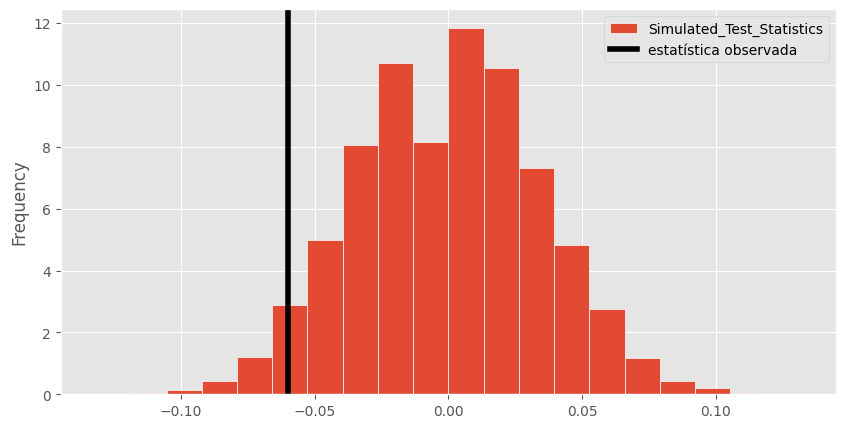

In [ ]:
t = bpd.DataFrame().assign(Simulated_Test_Statistics = simulated_test_statistics)
t.plot(kind='hist', density=True, ec='w', bins=20, figsize=(10, 5))
plt.axvline(x=observed_test_stat, color='black', label='estatística observada', linewidth=4)
plt.legend();

Podemos apresentar um argumento visual sobre se acreditamos ou não que a estatística de teste observada provavelmente ocorrerá sob o valor nulo, ou podemos usar a definição de valores-p para nos ajudar a apresentar um argumento mais formal.

**Pergunta 1.8.** Primeiro, vamos lembrar o que é um valor p. Atribua `p_def` ao número correspondente à definição correta de um valor p.

1. A chance, sob a hipótese nula, de que a estatística do teste seja igual ao valor observado.
2. A chance, sob a hipótese nula, de que a estatística de teste seja igual ao valor observado ou esteja ainda mais na direção da alternativa.
3. A chance, sob a hipótese alternativa, de que a estatística de teste seja igual ao valor que foi observado ou esteja ainda mais na direção do nulo.
4. O número de vezes, sob a hipótese nula, que a estatística de teste é igual ao valor observado ou está ainda mais na direção da alternativa.

In [ ]:
p_def = 2

**Pergunta 1.9.** Usando a definição acima, calcule o valor p para o experimento de Emily e atribua-o a `emily_p_val`.

***Dica:*** Valores grandes de nossa estatística de teste fazem você se inclinar para o nulo ou para a alternativa? Consulte a Aula 21 ou [CIT 11.1](https://inferentialthinking.com/chapters/11/1/Assessing_a_Model.html) para obter exemplos.

In [ ]:
emily_p_val = (np.count_nonzero(simulated_test_statistics <= observed_test_stat) / num_repetitions) + (np.count_nonzero(simulated_test_statistics >= 0 - observed_test_stat) / num_repetitions)
emily_p_val

0.0696

Como queremos ter certeza sobre a eficácia dos tratamentos médicos, vamos usar um nível de significância de 0,01, a convenção padrão para ser “altamente estatisticamente significativo”. Isso significa que se nosso valor p for menor ou igual a 0,01, então rejeitamos a hipótese nula em favor da alternativa. Caso contrário, não rejeitaremos a hipótese nula. **Observe que isso não significa que aceitamos a hipótese nula como correta, mas sim que não temos evidências suficientes para rejeitá-la.**

Seu valor p e esta convenção devem ajudá-lo a tirar suas próprias conclusões sobre o experimento de Emily Rosa.

O Toque Terapêutico caiu em desuso após esse experimento, que acabou sendo [
aceito em um jornal médico de prestígio](https://pubmed.ncbi.nlm.nih.gov/9533499/). Os praticantes de TT reagiram e acusaram Emily e sua família de adulterar os resultados, enquanto alguns alegaram que o mau humor espiritual de Emily em relação ao Toque Terapêutico dificultava a leitura de seu HEF. Seja o que for, o experimento de Emily é um exemplo clássico de como qualquer pessoa, com os recursos certos, pode testar o que quiser!

## 2. Anúncios no YouTube ▶️

O YouTube, a maior plataforma de compartilhamento de vídeos do mundo, gera receita com anúncios que aparecem antes e durante os vídeos.

Suponha que o YouTube divulgue publicamente uma declaração revelando que 94% dos seus anúncios podem ser ignorados (o que significa que, supostamente, apenas 6% dos seus anúncios não podem ser ignorados).

King Triton, o fiel mascote da UCSD, queria testar se esta afirmação era verdadeira. Ele clicou em vários vídeos e registrou se os anúncios em cada vídeo podiam ou não ser ignorados. Ele assistiu a vídeos até chegar a 100 anúncios e descobriu que 16 deles não eram puláveis, ou apenas 84% ​​eram puláveis. King Triton está irritado e acredita que a reivindicação de 94% do YouTube é muito alta. Vamos investigar!

<!-- COMEÇAR PERGUNTA -->

**Pergunta 2.1.** Você decide realizar um teste de hipótese. Quais são as hipóteses nula e alternativa para o seu teste? Escreva ambas as respostas na célula abaixo.

<!--
COMEÇAR PERGUNTA
nome: q2_1
manual: verdadeiro
-->

_Digite sua resposta aqui, substituindo este texto._

<!-- FIM DA PERGUNTA -->



**Pergunta 2.2.** Atribua `null_probabilities` a uma *matriz* de dois itens, de modo que o **primeiro** elemento seja a chance de um anúncio do YouTube ser **pulável**, e o **segundo** elemento é a chance de um anúncio do YouTube ser **não pulável**, sob as suposições da **hipótese nula**.

In [ ]:
null_probabilities = [0.06, 0.94]
null_probabilities

[0.06, 0.94]

**Pergunta 2.3.** Usando a matriz definida acima, simule o ato de assistir a 100 anúncios no YouTube, 10.000 vezes. Crie um array chamado `unskippable_counts` contendo o **número de anúncios não ignoráveis** em cada simulação.

In [ ]:
def count_unskippables(n):
    arr = np.array([])
    for i in range(n):
        num = np.random.choice([True, False], 100, replace=True, p=null_probabilities)
        arr = np.append(arr, np.count_nonzero(num))

    return arr

unskippable_counts = count_unskippables(10_000)
unskippable_counts

array([3., 5., 5., ..., 4., 2., 3.])

Execute a célula abaixo para visualizar os resultados da simulação.

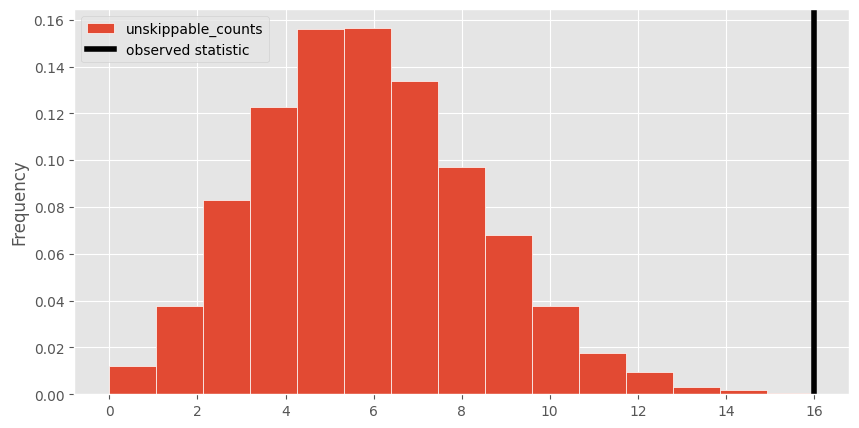

In [ ]:
bpd.DataFrame().assign(unskippable_counts = unskippable_counts) \
               .plot(kind='hist', density=True, bins=15, ec='w', figsize=(10, 5))
plt.axvline(x=16, color='black', label='observed statistic', linewidth=4)
plt.legend();

**Pergunta 2.4.** Use os resultados da simulação para calcular o valor p para este teste de hipótese e atribua sua resposta a `unskippable_p_val`.

In [ ]:
delay_p_val = (np.count_nonzero(unskippable_counts >= 16) / 10000) + (np.count_nonzero(unskippable_counts <= 2 * unskippable_counts.mean() - 16) / 10000)
delay_p_val

0.0001

Você deve ser capaz de perceber, tanto pelo histograma quanto pelo valor-p calculado, que o YouTube parece ter mais anúncios que não podem ser ignorados do que afirmam! Talvez eles tenham cometido um erro de digitação no anúncio e quisessem dizer 84% em vez de 94%?

## Linha de chegada 🏁

Parabéns! Você concluiu o Laboratório 6.

**Citações:** Você usou alguma ferramenta generativa de inteligência artificial para ajudá-lo nesta tarefa? Em caso afirmativo, indique, para cada ferramenta que você usou, o nome da ferramenta (ex. ChatGPT) e o(s) problema(s) nesta tarefa onde você usou a ferramenta para obter ajuda.

<hr style="cor:Marrom;cor de fundo:Marrom;borda:0 nenhum; altura: 3px;">

Por favor, cite ferramentas aqui.

<hr style="cor:Marrom;cor de fundo:Marrom;borda:0 nenhum; altura: 3px;">

Para enviar sua tarefa:

1. Selecione `Kernel -> Reiniciar e executar tudo` para garantir que você executou todas as células, incluindo as células de teste.
2. Leia o caderno para ter certeza de que está tudo bem e que todos os testes foram aprovados.
3. Baixe seu notebook usando `Arquivo -> Baixar como -> Notebook (.ipynb)` e, em seguida, carregue seu notebook para o Moodle.